**Data Mining Project, midterm 2021/2022**




**Authors:** Niko Dalla Noce, Alessandro Ristori, Giuseppe Lombardi

#**Task 1.1 Data Understanding**

##**Importing libraries and extracting datasets**

First we have to import the necessary libraries to work within our project.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import scipy
import seaborn as sn
import scipy
from tqdm import tqdm

We assume that the dataset is inside a zip file, so we need to extract it.

In [ ]:
import zipfile
with zipfile.ZipFile("prj_data.zip", 'r') as zip_ref:
     zip_ref.extractall()

FileNotFoundError: ignored

**Load the datasets**

Read the data from the three csv files, each one is assigned to a different dataframe for now.

In [ ]:
df_male = pd.read_csv("male_players.csv", sep=",")  # dataframe of male players
df_female = pd.read_csv("female_players.csv", sep=",")  # dataframe of female players
df_matches = pd.read_csv("tennis_matches.csv", sep=",", index_col=0)  # matches dataframe

##**Data semantics**

###**Some informations about the dataset**

The players' dataframes, men and women, contain only the name and surname of the players (most of them are retired from the competitions and can't be found in any match record). That's why we decided to focus our work only on the match dataframe for now.

In [ ]:
df_matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_spectators,tourney_revenue
0,2019-M020,Brisbane,Hard,32.0,A,20181231.0,300.0,105453.0,NaN,Kei Nishikori,R,178.0,JPN,95.000000,106421.0,NaN,Daniil Medvedev,R,198.0,RUS,22.885695,6-4 3-6 6-2,3.0,F,124.0,3.0,3.0,77.0,44.0,31.0,17.0,13.0,3.0,6.0,8.0,6.0,100.0,54.0,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0,3928.0,742618.69
1,2019-M020,Brisbane,Hard,32.0,A,20181231.0,299.0,106421.0,NaN,Daniil Medvedev,R,198.0,RUS,22.885695,104542.0,PR,Jo-Wilfried Tsonga,R,188.0,FRA,33.705681,7-6(6) 6-2,3.0,SF,82.0,10.0,1.0,52.0,33.0,28.0,14.0,10.0,0.0,1.0,17.0,2.0,77.0,52.0,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0,3928.0,742618.69
2,2019-M020,Brisbane,Hard,32.0,A,20181231.0,298.0,105453.0,NaN,Kei Nishikori,R,178.0,JPN,29.004791,104871.0,NaN,Jeremy Chardy,R,188.0,FRA,31.882272,6-2 6-2,3.0,SF,66.0,2.0,2.0,47.0,33.0,26.0,9.0,8.0,2.0,2.0,10.0,3.0,46.0,27.0,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0,3928.0,742618.69
3,2019-M020,Brisbane,Hard,32.0,A,20181231.0,297.0,104542.0,PR,Jo-Wilfried Tsonga,R,188.0,FRA,33.705681,200282.0,NaN,Alex De Minaur,R,183.0,AUS,19.868583,6-4 7-6(2),3.0,QF,106.0,12.0,2.0,68.0,43.0,34.0,15.0,11.0,4.0,5.0,1.0,2.0,81.0,60.0,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0,3928.0,742618.69
4,2019-M020,Brisbane,Hard,32.0,A,20181231.0,296.0,106421.0,NaN,Daniil Medvedev,R,198.0,RUS,22.885695,105683.0,NaN,Milos Raonic,R,196.0,CAN,28.010951,6-7(2) 6-3 6-4,3.0,QF,129.0,12.0,3.0,105.0,68.0,48.0,25.0,16.0,8.0,8.0,29.0,5.0,94.0,56.0,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0,3928.0,742618.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186123,NaN,NaN,Hard,32.0,NaN,20171113.0,250.0,NaN,NaN,NaN,NaN,NaN,NaN,26.206708,206075.0,NaN,NaN,NaN,NaN,NaN,26.904860,3-6 6-2 6-3,NaN,NaN,NaN,NaN,1.0,NaN,49.0,38.0,16.0,NaN,7.0,NaN,1.0,3.0,93.0,NaN,NaN,NaN,NaN,7.0,11.0,NaN,322.0,280.0,183.0,NaN,NaN
186124,NaN,Taipei,NaN,32.0,C,20171113.0,NaN,NaN,NaN,Veronika Kudermetova,NaN,175.0,NaN,NaN,214562.0,WC,Ingrid Neel,NaN,NaN,USA,NaN,7-6(3) 6-2,NaN,NaN,71.0,10.0,8.0,63.0,NaN,32.0,NaN,10.0,2.0,5.0,NaN,NaN,68.0,NaN,NaN,NaN,NaN,NaN,NaN,255.0,217.0,704.0,NaN,NaN,NaN
186125,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,Dalila Jakupovic,NaN,NaN,NaN,26.642026,201674.0,NaN,NaN,R,NaN,UZB,NaN,NaN,3.0,NaN,70.0,NaN,2.0,55.0,NaN,NaN,NaN,NaN,6.0,8.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN
186126,NaN,NaN,NaN,32.0,C,20171113.0,NaN,NaN,NaN,Vitalia Diatchenko,NaN,170.0,RUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-6 6-2 6-4,3.0,NaN,115.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,0.0,75.0,NaN,NaN,13.0,NaN,3.0,NaN,176.0,NaN,NaN,NaN,3535.0,NaN


We found that the last records of the matches dataset (the Taipei tournament) are missing a lot of values, but, for now, let's take a look at the dataset info and plot its heatmap, so we can take a wider look at the missing values.

In [ ]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186128 entries, 0 to 186127
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          186073 non-null  object 
 1   tourney_name        186103 non-null  object 
 2   surface             185940 non-null  object 
 3   draw_size           186099 non-null  float64
 4   tourney_level       186099 non-null  object 
 5   tourney_date        186100 non-null  float64
 6   match_num           186101 non-null  float64
 7   winner_id           186073 non-null  float64
 8   winner_entry        25827 non-null   object 
 9   winner_name         186101 non-null  object 
 10  winner_hand         186082 non-null  object 
 11  winner_ht           49341 non-null   float64
 12  winner_ioc          186099 non-null  object 
 13  winner_age          183275 non-null  float64
 14  loser_id            186100 non-null  float64
 15  loser_entry         44154 non-null

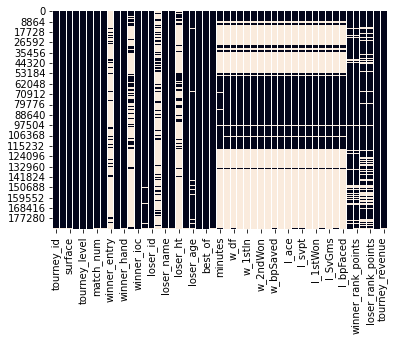

In [ ]:
sn.heatmap(df_matches.isnull(), cbar=False)

The dataset is missing heavily a lot of values, before we solve this issue, we need to work the types and duplicated records.

In [ ]:
# df_matches.describe()

###**Type casting**

Most of the attributes have a wrong type, we need to fix it.

In [ ]:
df_matches.dtypes

tourney_id             object
tourney_name           object
surface                object
draw_size             float64
tourney_level          object
tourney_date          float64
match_num             float64
winner_id             float64
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
loser_id              float64
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
score                  object
best_of               float64
round                  object
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt                float64
w_1stIn               float64
w_1stWon              float64
w_2ndWon              float64
w_SvGms               float64
w_bpSaved             float64
w_bpFaced 

In [ ]:
df_matches['tourney_date']= df_matches['tourney_date'].astype(pd.Int32Dtype(), errors='ignore').astype(pd.StringDtype())
df_matches['tourney_date'] = pd.to_datetime(df_matches['tourney_date'], errors='coerce', format='%Y%m%d')
df_matches.iloc[:, [3, 6, 7, 11, 14, 18, 22]] = df_matches.iloc[:, [3, 6, 7, 11, 14, 18, 22]].astype("Int64", errors="ignore")
df_matches.iloc[:, 24:48] = df_matches.iloc[:, 24:48].astype("Int64", errors="ignore")
df_matches.dtypes

tourney_id                    object
tourney_name                  object
surface                       object
draw_size                      Int64
tourney_level                 object
tourney_date          datetime64[ns]
match_num                      Int64
winner_id                      Int64
winner_entry                  object
winner_name                   object
winner_hand                   object
winner_ht                      Int64
winner_ioc                    object
winner_age                   float64
loser_id                       Int64
loser_entry                   object
loser_name                    object
loser_hand                    object
loser_ht                       Int64
loser_ioc                     object
loser_age                    float64
score                         object
best_of                        Int64
round                         object
minutes                        Int64
w_ace                          Int64
w_df                           Int64
w

###**Dropping Duplicates**

Since there shouldn't be any duplitcated matches, we need to find and drop them.

In [ ]:
ndupl = df_matches.duplicated()
ndupl = df_matches[ndupl]
print("Number of duplicated matches: {0}, they are the {1}% of the total number of matches".format(len(ndupl), len(ndupl)/len(df_matches)*100))
ndupl

Number of duplicated matches: 309, they are the 0.16601478552394053% of the total number of matches


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_spectators,tourney_revenue
12066,2017-1059,Taipei,Hard,32,C,2017-11-13,243,214562,WC,Ingrid Neel,U,<NA>,USA,19.411362,203475,NaN,Carol Zhao,R,<NA>,CAN,22.401095,6-7(7) 7-6(6) 6-2,3,Q1,154,7,10,124,84,53,14,16,7,13,9,17,151,90,54,21,16,14,22,704,27,150,390,3535,638954.72
12067,2017-1059,Taipei,Hard,32,C,2017-11-13,244,206368,NaN,Veronika Kudermetova,R,175,RUS,20.555784,203576,NaN,Kai Lin Zhang,R,<NA>,CHN,27.791923,7-6(2) 7-5,3,Q1,104,4,6,87,54,36,13,12,5,10,0,8,82,50,23,15,12,3,9,255,217,208,274,3535,638954.72
12068,2017-1059,Taipei,Hard,32,C,2017-11-13,245,203435,NaN,Dalila Jakupovic,R,<NA>,SLO,26.642026,211874,NaN,Victoria Rodriguez,U,<NA>,MEX,22.562628,6-2 6-3,3,Q1,69,0,2,46,29,19,8,9,2,5,0,3,60,42,19,6,8,5,11,242,228,262,204,3535,638954.72
12069,2017-1059,Taipei,Hard,32,C,2017-11-13,246,201674,NaN,Sabina Sharipova,R,<NA>,UZB,23.192334,214541,NaN,Fanny Stollar,R,172,HUN,19.003422,6-1 7-6(2),3,Q1,80,2,4,71,43,30,13,10,3,6,4,7,80,45,27,10,9,7,12,196,299,238,231,3535,638954.72
12070,2017-1059,Taipei,Hard,32,C,2017-11-13,247,211411,NaN,Nina Stojanovic,R,<NA>,SRB,21.289528,204291,NaN,Na Lae Han,L,<NA>,KOR,25.355236,7-6(3) 6-3,3,Q1,91,5,3,79,49,34,11,11,4,8,0,4,68,41,23,9,10,2,7,230,243,250,221,3535,638954.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177376,2020-1103,Indian Wells 125K,Hard,64,C,2020-03-02,221,203398,NaN,Danielle Lao,R,<NA>,USA,28.763860,213949,WC,Hanna Chang,U,<NA>,USA,22.015058,6-1 5-7 6-2,3,Q1,170,0,3,119,86,54,16,14,12,15,3,7,84,52,30,14,13,3,9,198,296,295,184,4638,1164466.18
177377,2020-1103,Indian Wells 125K,Hard,64,C,2020-03-02,222,201534,NaN,Asia Muhammed,R,<NA>,USA,28.911704,215064,WC,Maria Mateas,U,<NA>,USA,20.616016,7-5 2-6 6-3,3,Q1,157,3,4,100,60,32,14,14,13,22,0,6,100,75,39,6,15,10,20,194,304,413,103,4638,1164466.18
177378,2020-1103,Indian Wells 125K,Hard,64,C,2020-03-02,221,203398,NaN,Danielle Lao,R,<NA>,USA,28.763860,213949,WC,Hanna Chang,U,<NA>,USA,22.015058,6-1 5-7 6-2,3,Q1,170,0,3,119,86,54,16,14,12,15,3,7,84,52,30,14,13,3,9,198,296,295,184,4638,1164466.18
177379,2020-1103,Indian Wells 125K,Hard,64,C,2020-03-02,222,201534,NaN,Asia Muhammed,R,<NA>,USA,28.911704,215064,WC,Maria Mateas,U,<NA>,USA,20.616016,7-5 2-6 6-3,3,Q1,157,3,4,100,60,32,14,14,13,22,0,6,100,75,39,6,15,10,20,194,304,413,103,4638,1164466.18


We can drop all the duplicates now.

In [ ]:
df_matches = df_matches.drop_duplicates()

###**Dealing with Missing Values**

We have to deal with missing values for each attribute.

In [ ]:
print("NULL FIELDS:")
print(df_matches.isnull().any())

NULL FIELDS:
tourney_id            True
tourney_name          True
surface               True
draw_size             True
tourney_level         True
tourney_date          True
match_num             True
winner_id             True
winner_entry          True
winner_name           True
winner_hand           True
winner_ht             True
winner_ioc            True
winner_age            True
loser_id              True
loser_entry           True
loser_name            True
loser_hand            True
loser_ht              True
loser_ioc             True
loser_age             True
score                 True
best_of               True
round                 True
minutes               True
w_ace                 True
w_df                  True
w_svpt                True
w_1stIn               True
w_1stWon              True
w_2ndWon              True
w_SvGms               True
w_bpSaved             True
w_bpFaced             True
l_ace                 True
l_df                  True
l_svpt         

**Fixing tourney_id**

The attribute tourney_id has missing values in corrispondece with only the Taipei tournament (which doesn't have many more values), moreover we found that this event is already in the dataset with better filled records, we decided to drop it from the dataframe.

In [ ]:
df_matches = df_matches.dropna(subset=["tourney_id"])
df_matches.isnull().any()

tourney_id            False
tourney_name          False
surface                True
draw_size             False
tourney_level         False
tourney_date          False
match_num             False
winner_id             False
winner_entry           True
winner_name           False
winner_hand            True
winner_ht              True
winner_ioc            False
winner_age             True
loser_id              False
loser_entry            True
loser_name            False
loser_hand             True
loser_ht               True
loser_ioc             False
loser_age              True
score                  True
best_of               False
round                 False
minutes                True
w_ace                  True
w_df                   True
w_svpt                 True
w_1stIn                True
w_1stWon               True
w_2ndWon               True
w_SvGms                True
w_bpSaved              True
w_bpFaced              True
l_ace                  True
l_df                

As we can notice, by dropping the Taipei tournament (the one at the end of the dataset) many more attributes don't have missing values anymore, this will make our analisys easier. Moreover, the Taipei tournament is already in the dataset, so our decision won't have any negative effect on future work.

**Fixing surface**

We try to solve the null values in the "surface" feature, first we count how many tournaments and matches have no surfaces for pure statistical reasons. If a tournament is missing the surface we can retrieve it if at least one match of the same tournament has it.

In [ ]:
# tournaments with no surface
tourney_no_surface = df_matches[pd.isnull(df_matches['surface'])]['tourney_id'].unique()

# matches with no surface
matches_no_surface = df_matches[df_matches['tourney_id'].isin(tourney_no_surface)][['tourney_id', 'surface']]

print("Number of tournaments without a surface: {0}".format(len(tourney_no_surface)))
print("Number of matches without a surface: {0}".format(len(matches_no_surface)))
print("Number of tournaments for which we can retrieve the surface: {0}".
      format(len(matches_no_surface[matches_no_surface['surface'].notnull()])))

Number of tournaments without a surface: 62
Number of matches without a surface: 162
Number of tournaments for which we can retrieve the surface: 0


Unluckily there are no tournaments for which we can retrieve the surface (all of them are from the Davis or Federation cup, where the surface changes from event to event), so we chose to sample such values from the distribution of the surfaces.

In [ ]:
# all possible values of "surface" attribute normalized
surface_distribution = df_matches["surface"].value_counts(normalize=True)
print("Distribution of each surface:\n{0}\n".format(surface_distribution))
print("Distribution of each surface cumulative:\n{0}\n".format(surface_distribution.cumsum()))

# sample surfaces and assing them to each tournament
for tourney in tourney_no_surface:
  sampled_surface = surface_distribution.sample(weights=surface_distribution, axis=0).index[0]
  print("Tournament: {0}, Surface sampled: {1}".format(tourney, sampled_surface))
  surface_mask = df_matches["tourney_id"] == tourney
  df_matches.loc[surface_mask, "surface"] = df_matches.loc[surface_mask, "surface"].fillna(sampled_surface)

Distribution of each surface:
Hard      0.511503
Clay      0.436488
Grass     0.035560
Carpet    0.016449
Name: surface, dtype: float64

Distribution of each surface cumulative:
Hard      0.511503
Clay      0.947991
Grass     0.983551
Carpet    1.000000
Name: surface, dtype: float64

Tournament: 2017-W-FC-2017-G2-AM-A-M-ECU-CUB-01, Surface sampled: Clay
Tournament: 2017-W-FC-2017-G2-AM-A-M-ECU-URU-01, Surface sampled: Hard
Tournament: 2017-W-FC-2017-G2-AM-A-M-URU-CUB-01, Surface sampled: Hard
Tournament: 2017-W-FC-2017-G2-AM-B-M-DOM-BAR-01, Surface sampled: Hard
Tournament: 2017-W-FC-2017-G2-AM-B-M-GUA-BAR-01, Surface sampled: Clay
Tournament: 2017-W-FC-2017-G2-AM-B-M-GUA-DOM-01, Surface sampled: Hard
Tournament: 2017-W-FC-2017-G2-AM-C-M-PUR-HON-01, Surface sampled: Hard
Tournament: 2017-W-FC-2017-G2-AM-C-M-PUR-TTO-01, Surface sampled: Hard
Tournament: 2017-W-FC-2017-G2-AM-C-M-TTO-HON-01, Surface sampled: Clay
Tournament: 2017-W-FC-2017-G2-AM-D-M-BAH-PAN-01, Surface sampled: Hard
Tourn

In [ ]:
df_matches["surface"].isnull().any()

False

**Fixing winner_hand and loser_hand**

We have to manage the missing values for "winner_hand" and "loser_hand", for doing that we need to understand if the preferred hand is missing only in some records or it never appear for a certain player. Moreover, we have to verify is the missing hand for the winners is still null when those players appear inside the "loser_name" attribute (and viceversa).

For what concerns the preferred hand by both winners and losers, its possible values are "L", "R" or "U". Many records have null values and so it could mean that we can assume that those values can be replace with "U".

In [ ]:
df_matches['winner_hand'].fillna('U', inplace=True)
df_matches['loser_hand'].fillna('U', inplace=True)

Let's see if there are players with preferred hand "U" but, actually, their hand is already defined "L" or "R" inside one of the record of the dataset, we can modify all the matches they belong to.

In [ ]:
def fill_attribute_with_actual_values(attribute: str):
  winner_attribute = "winner_" + attribute
  loser_attribute = "loser_" + attribute

  # player that have won or lost at least one match with unknown attribute
  winner_unk_attribute = df_matches[df_matches[winner_attribute] == 'U']['winner_name'].unique()
  loser_unk_attribute = df_matches[df_matches[loser_attribute] == 'U']['loser_name'].unique()
  players_unk_attribute = set(np.concatenate((winner_unk_attribute, loser_unk_attribute)))
  print("Players with unknown {0}: {1}\n".format(attribute, len(players_unk_attribute)))

  # all the winners that appear in the players_unk_attribute set
  w = df_matches[df_matches['winner_name'].isin(players_unk_attribute)][['winner_name', winner_attribute]]
  w = w[w[winner_attribute] != 'U'].drop_duplicates()

  # all the winners that appear in the players_unk_attribute set
  l = df_matches[df_matches['loser_name'].isin(players_unk_attribute)][['loser_name', loser_attribute]]
  l = l[l['loser_hand'] != 'U'].drop_duplicates()

  l.rename(columns={'loser_name': 'player', loser_attribute: attribute}, inplace=True)
  w.rename(columns={'winner_name': 'player', winner_attribute: attribute}, inplace=True)

  # concatenate the winners and losers
  winner_loser_attribute = pd.concat([l, w]).drop_duplicates()
  print("Players that belong to records in which they have no {0} defined, but we retrieved it:\n{1}\n".format(attribute, winner_loser_attribute))

  for _, x in winner_loser_attribute.iterrows():
    attribute_actual_value = x[attribute]
    df_matches.loc[df_matches['winner_name'] == x['player'], winner_attribute] = attribute_actual_value
    df_matches.loc[df_matches['loser_name'] == x['player'], loser_attribute] = attribute_actual_value

In [ ]:
fill_attribute_with_actual_values("hand")

Players with unknown hand: 6307

Players that belong to records in which they have no hand defined, but we retrieved it:
                      player hand
468       Ekaterina Makarova    L
1809            Qinwen Zheng    R
54654   Hei Ching Claudia Ng    R
64643               Eva Shaw    R
99997           Amina Anshba    L
100012       Weronika Baszak    R
139277    Anastasia Kulikova    L
164256         Vanessa Ersoz    R



Now we can sample a preferred hand for each player with that unknown value.

In [ ]:
w_hand = df_matches[["winner_name", "winner_hand"]].rename(columns={"winner_name": "name", "winner_hand": "hand"})
l_hand = df_matches[["loser_name", "loser_hand"]].rename(columns={"loser_name": "name", "loser_hand": "hand"})
players_hand = w_hand.append(l_hand).drop_duplicates()
hand_distribution = players_hand[players_hand["hand"]!="U"]["hand"].value_counts(normalize=True)
print("Distribution of each preferred hand:\n{0}\n".format(hand_distribution))
# print("Distribution of each preferred hand cumulative:\n{0}\n".format(hand_distribution.cumsum()))

Distribution of each preferred hand:
R    0.893824
L    0.106176
Name: hand, dtype: float64



In [ ]:
players_unk_hand = players_hand[players_hand["hand"]=="U"]["name"]

for player in tqdm(players_unk_hand):
  sampled_hand = hand_distribution.sample(weights=hand_distribution, axis=0).index[0]
  df_matches.loc[df_matches['winner_name'] == player, "winner_hand"] = sampled_hand
  df_matches.loc[df_matches['loser_name'] == player, "loser_hand"] = sampled_hand

100%|██████████| 6299/6299 [03:03<00:00, 34.27it/s]


In [ ]:
print("Winners with unknown hand: {0}".format(len(df_matches[df_matches["winner_hand"] == "U"])))
print("Losers with unknown hand: {0}".format(len(df_matches[df_matches["loser_hand"] == "U"])))

Winners with unknown hand: 0
Losers with unknown hand: 0


In [ ]:
print(df_matches["winner_hand"].isnull().any())
print(df_matches["loser_hand"].isnull().any())

False
False


In [ ]:
"""r = df_matches[['winner_id', 'winner_name']].drop_duplicates()
s = r["winner_id"].value_counts().to_frame()
s = list(s[s["winner_id"]>1].index)
r[r["winner_id"].isin(s)]"""

'r = df_matches[[\'winner_id\', \'winner_name\']].drop_duplicates()\ns = r["winner_id"].value_counts().to_frame()\ns = list(s[s["winner_id"]>1].index)\nr[r["winner_id"].isin(s)]'

**Fixing winner_ht and loser_ht**

Le features winner_ht e loser_ht presentano anch'esse dei valori nulli.

In [ ]:
winner_nan_ht = df_matches[pd.isna(df_matches['winner_ht'])]['winner_name'].unique()
w = df_matches[df_matches['winner_name'].isin(winner_nan_ht)][['winner_name', 'winner_ht']]
w = w[w['winner_ht'].notnull()].drop_duplicates()

l = df_matches[df_matches['loser_name'].isin(winner_nan_ht)][['loser_name', 'loser_ht']]
l = l[l['loser_ht'].notnull()].drop_duplicates()

l.rename(columns={'loser_name': 'player', 'loser_ht': 'ht'}, inplace=True)
w.rename(columns={'winner_name': 'player', 'winner_ht': 'ht'}, inplace=True)

tot = pd.concat([l, w]).drop_duplicates()

for i, x in tot.iterrows():
    ht = x['ht']
    df_matches.loc[df_matches['winner_name'] == x['player'], 'winner_ht'] = ht

In [ ]:
loser_nan_ht = df_matches[pd.isna(df_matches['loser_ht'])]['loser_name'].unique()
l = df_matches[df_matches['loser_name'].isin(loser_nan_ht)][['loser_name', 'loser_ht']]
l = l[l['loser_ht'].notnull()].drop_duplicates()

w = df_matches[df_matches['winner_name'].isin(loser_nan_ht)][['winner_name', 'winner_ht']]
w = w[w['winner_ht'].notnull()].drop_duplicates()

l.rename(columns={'loser_name': 'player', 'loser_ht': 'ht'}, inplace=True)
w.rename(columns={'winner_name': 'player', 'winner_ht': 'ht'}, inplace=True)

tot = pd.concat([l, w]).drop_duplicates()

for i, x in tot.iterrows():
    ht = x['ht']
    df_matches.loc[df_matches['loser_name'] == x['player'], 'loser_ht'] = ht


Provo a risolvere i problemi legati ai dati mancanti sull'eta per quei giocatori di cui in realtà la loro data di nascita è nota.

In [ ]:
import datetime, math

def birth_date(age, a_date):
    days = datetime.timedelta(math.ceil(age * 365) + int(age / 4))
    return a_date - days

def age_calc(birth_date, curr_date):
    days = (curr_date - birth_date).days
    age = days / 365
    age = age - int(age / 4) / 365
    return age

def assign_age(records, birth_d, feat):
    for i, x in records.iterrows():
        tourney_date: pd.Timestamp = x['tourney_date']
        py_date = tourney_date.to_pydatetime(warn=False)
        age = age_calc(birth_d, py_date)
        records.loc[i, feat] = age

In [ ]:
winner_nan_age = df_matches[pd.isna(df_matches['winner_age'])]['winner_name'].unique()
w = df_matches[df_matches['winner_name'].isin(winner_nan_age)][['winner_name', 'winner_age', 'tourney_date']]
w = w[w['winner_age'].notnull()].drop_duplicates()

l = df_matches[df_matches['loser_name'].isin(winner_nan_age)][['loser_name', 'loser_age', 'tourney_date']]
l = l[l['loser_age'].notnull()].drop_duplicates()

l.rename(columns={'loser_name': 'player', 'loser_age': 'age'}, inplace=True)
w.rename(columns={'winner_name': 'player', 'winner_age': 'age'}, inplace=True)

l.drop_duplicates(subset='player', inplace=True)
w.drop_duplicates(subset='player', inplace=True)

tot = pd.concat([l, w]).drop_duplicates()

for i, x in tot.iterrows():
    tourney_date: pd.Timestamp = x['tourney_date']
    py_date = tourney_date.to_pydatetime(warn=False)
    birth_d = birth_date(x['age'], py_date)
    records = df_matches.loc[(df_matches['winner_name'] == x['player']) & (pd.isna(df_matches['winner_age']))]
    assign_age(records, birth_d, 'winner_age')
    df_matches.loc[records.index] = records

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
loser_nan_age = df_matches[pd.isna(df_matches['loser_age'])]['loser_name'].unique()
l = df_matches[df_matches['loser_name'].isin(loser_nan_age)][['loser_name', 'loser_age', 'tourney_date']]
l = l[l['loser_age'].notnull()].drop_duplicates()

w = df_matches[df_matches['winner_name'].isin(loser_nan_age)][['winner_name', 'winner_age', 'tourney_date']]
w = w[w['winner_age'].notnull()].drop_duplicates()

l.rename(columns={'loser_name': 'player', 'loser_age': 'age'}, inplace=True)
w.rename(columns={'winner_name': 'player', 'winner_age': 'age'}, inplace=True)

l.drop_duplicates(subset='player', inplace=True)
w.drop_duplicates(subset='player', inplace=True)

tot = pd.concat([l, w]).drop_duplicates()

for i, x in tot.iterrows():
    tourney_date: pd.Timestamp = x['tourney_date']
    py_date = tourney_date.to_pydatetime(warn=False)
    birth_d = birth_date(x['age'], py_date)
    records = df_matches.loc[(df_matches['loser_name'] == x['player']) & (pd.isna(df_matches['loser_age']))]
    assign_age(records, birth_d, 'loser_age')
    df_matches.loc[records.index] = records

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
print(df_matches.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185764 entries, 0 to 186072
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   tourney_id          185764 non-null  object        
 1   tourney_name        185764 non-null  object        
 2   surface             185764 non-null  object        
 3   draw_size           185764 non-null  Int64         
 4   tourney_level       185764 non-null  object        
 5   tourney_date        185764 non-null  datetime64[ns]
 6   match_num           185764 non-null  Int64         
 7   winner_id           185764 non-null  Int64         
 8   winner_entry        25806 non-null   object        
 9   winner_name         185764 non-null  object        
 10  winner_hand         185764 non-null  object        
 11  winner_ht           51402 non-null   Int64         
 12  winner_ioc          185764 non-null  object        
 13  winner_age          182955 no

###**Outlier Detection**

In [ ]:
df_matches.describe()

We compute the first quartile, the third quartile the median and the interquartile for each feature

In [ ]:
Q1 = df_matches.quantile(0.25) #primo quartile
M = df_matches.quantile(0.5) #mediana
Q3 = df_matches.quantile(0.75) #terzo quartile
IQR = Q3 - Q1 #interquartile

We compute the Lower Bound and the Upper Bound for each feature

In [ ]:
L = Q1 - 1.5 * IQR #Lower Bound
U = Q3 + 1.5 * IQR #Upper Bound

**Height feature**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


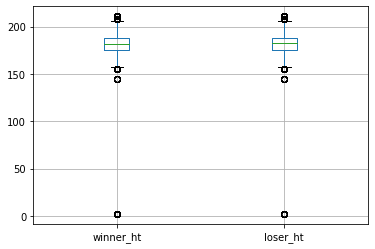

In [ ]:
df_matches.boxplot(column=["winner_ht", 'loser_ht']);

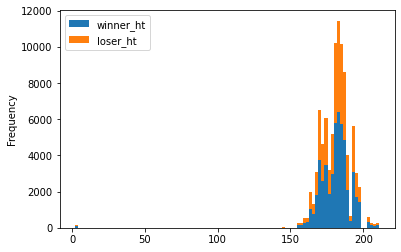

In [ ]:
df_matches[['winner_ht', 'loser_ht']].plot.hist(stacked=True, bins=100);

Detecting the outliers (First we use  smaller lower bound ad a bigger upper bound)

In [ ]:
df_matches.loc[(df_matches['winner_ht'] < 0.5*L['winner_ht']) |(df_matches['winner_ht'] > 2*U['winner_ht']),'winner_ht']

61084     2
61202     2
61249     2
61273     2
64609     2
         ..
182999    2
183015    2
183023    2
183027    2
185437    2
Name: winner_ht, Length: 100, dtype: Int64

There a very low value

In [ ]:
df_matches.loc[(df_matches['loser_ht'] < 0.5*L['loser_ht']) |(df_matches['loser_ht'] > 2 * U['loser_ht']),'loser_ht'].unique()

5557      2
16979     2
23431     2
23568     2
29152     2
42066     2
59544     2
61143     2
63934     2
64665     2
92201     2
97833     2
98404     2
98501     2
98646     2
98723     2
98854     2
99210     2
99469     2
99923     2
100055    2
100286    2
117082    2
117662    2
127476    2
127505    2
129430    2
129459    2
129587    2
132367    2
132907    2
134401    2
134864    2
138749    2
142441    2
142908    2
144735    2
146668    2
149230    2
149339    2
149348    2
152012    2
153202    2
153287    2
153382    2
154614    2
154691    2
155188    2
162298    2
163784    2
168169    2
177111    2
177525    2
177592    2
178526    2
183029    2
185448    2
Name: loser_ht, dtype: Int64

In [ ]:
df_matches.loc[(df_matches['winner_ht'] < 0.5*L['winner_ht']) |(df_matches['winner_ht'] > 2*U['winner_ht']),'winner_name'].unique()

array(['Kamilla Rakhimova'], dtype=object)

In [ ]:
df_matches.loc[(df_matches['loser_ht'] < 0.5*L['loser_ht']) |(df_matches['loser_ht'] > 2 * U['loser_ht']),'loser_name'].unique()

array(['Kamilla Rakhimova'], dtype=object)

The very low value is replaced with the max between the Lower Bound of 'winner_ht' and the Lower Bound of 'loser_ht'


In [ ]:
df_matches.loc[(df_matches['winner_ht'] < 0.5 * L['winner_ht']),'winner_ht'] = int(max(L['winner_ht'], L['loser_ht']))

In [ ]:
df_matches.loc[(df_matches['loser_ht'] < 0.5 * L['loser_ht']),'loser_ht'] = int(max(L['winner_ht'], L['loser_ht']))

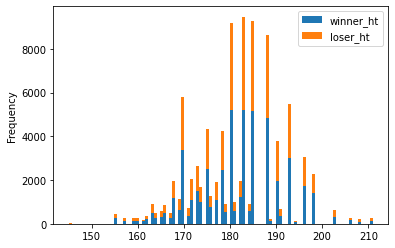

In [ ]:
df_matches[['winner_ht', 'loser_ht']].plot.hist(stacked=True, bins=100);

There are very tall player (using U as upper bound)

In [ ]:
df_matches[(df_matches['winner_ht'] > U['winner_ht'])]['winner_name'].unique()

NameError: ignored

In [ ]:
df_matches[(df_matches['loser_ht'] > U['loser_ht'])]['loser_name'].unique()

array(['Reilly Opelka', 'Ivo Karlovic'], dtype=object)

These players are really so tall

There are some players very short (using L as Lower Bound)

In [ ]:
df_matches[(df_matches['winner_ht'] < L['winner_ht'])]['winner_name'].unique()

array(['Kurumi Nara', 'Kamilla Rakhimova', 'Ilija Vucic'], dtype=object)

In [ ]:
df_matches[(df_matches['loser_ht'] < L['loser_ht'])]['loser_name'].unique()

array(['Kurumi Nara', 'Kamilla Rakhimova', 'Ilija Vucic'], dtype=object)

155 is the real height of Kurumi Nara

In [ ]:
df_matches[(df_matches['winner_name'] == 'Kurumi Nara')]['winner_ht'].unique()

<IntegerArray>
[155]
Length: 1, dtype: Int64

In [ ]:
df_matches[(df_matches['loser_name'] == 'Kurumi Nara')]['loser_ht'].unique()

<IntegerArray>
[155]
Length: 1, dtype: Int64

145 is not the real height of Ilija Vucic (its real height is 188 cm *source 'atptour'*)

In [ ]:
df_matches.loc[df_matches['loser_name'] == 'Ilija Vucic','loser_ht']

68905    188
70718    188
71391    188
71482    188
71735    188
75534    188
75789    188
79051    188
79396    188
81732    188
85970    188
Name: loser_ht, dtype: Int64

In [ ]:
df_matches.loc[df_matches['winner_name'] == 'Ilija Vucic','winner_ht']

70710    145
71373    145
71384    145
71719    145
71729    145
75781    145
79045    145
79391    145
81729    145
Name: winner_ht, dtype: Int64

In [ ]:
df_matches.loc[df_matches['loser_name'] == 'Ilija Vucic','loser_ht'] = 188

In [ ]:
df_matches.loc[df_matches['winner_name'] == 'Ilija Vucic','winner_ht'] = 188

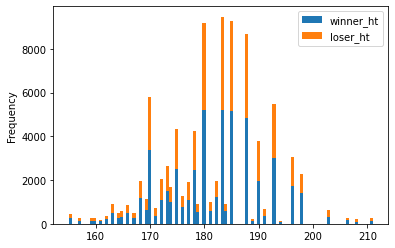

In [ ]:
df_matches[['winner_ht', 'loser_ht']].plot.hist(stacked=True, bins=100);

**Age feature**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


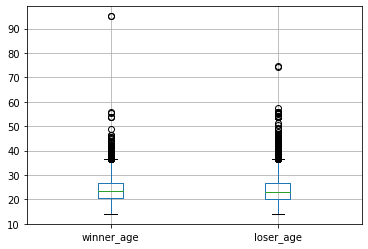

In [ ]:
df_matches.boxplot(column=["winner_age", "loser_age"]);

There are only players too old as outliers

In [ ]:
df_matches.loc[(df_matches['winner_age'] < L['winner_age']),'winner_age']

Series([], Name: winner_age, dtype: float64)

In [ ]:
df_matches.loc[(df_matches['winner_age'] > U['winner_age']),'winner_age']

0         95.000000
128       37.043121
141       39.838467
145       39.838467
152       39.838467
            ...    
180102    40.867899
180767    36.856947
181350    37.505818
181358    37.505818
183390    37.582478
Name: winner_age, Length: 1214, dtype: float64

In [ ]:
df_matches.loc[df_matches['winner_age'] > U['winner_age'],'winner_name']

0          Kei Nishikori
128        Paolo Lorenzi
141         Ivo Karlovic
145         Ivo Karlovic
152         Ivo Karlovic
               ...      
180102         Greta Arn
180767      Ioana Gaspar
181350    Junri Namigata
181358    Junri Namigata
183390    Junri Namigata
Name: winner_name, Length: 1214, dtype: object

We fix the age of Kei Nishikori

In [ ]:
df_matches.loc[df_matches['winner_name'] == 'Kei Nishikori','winner_age']

0         95.000000
2         29.004791
6         29.004791
14        29.004791
324       29.043121
            ...    
109413    28.084873
109415    28.084873
109416    28.084873
162711    26.168378
162860    26.877481
Name: winner_age, Length: 191, dtype: float64

In [ ]:
df_matches.loc[df_matches['winner_name'] == 'Kei Nishikori','tourney_date']

0        2018-12-31
2        2018-12-31
6        2018-12-31
14       2018-12-31
324      2019-01-14
            ...    
109413   2018-01-29
109415   2018-01-29
109416   2018-01-29
162711   2016-03-04
162860   2016-11-14
Name: tourney_date, Length: 191, dtype: datetime64[ns]

In [ ]:
df_matches.loc[0, 'winner_age'] = df_matches.loc[2, 'winner_age']

In [ ]:
df_matches.loc[df_matches['winner_name'] == 'Kei Nishikori','winner_age']

0         29.004791
2         29.004791
6         29.004791
14        29.004791
324       29.043121
            ...    
109413    28.084873
109415    28.084873
109416    28.084873
162711    26.168378
162860    26.877481
Name: winner_age, Length: 191, dtype: float64

We fix the age of Daniil Medvedev

In [ ]:
df_matches.loc[df_matches['winner_name'] == 'Daniil Medvedev','winner_age']

1         22.885695
4         22.885695
9         22.885695
322       95.000000
338       22.924025
            ...    
78983     20.892539
78985     20.892539
83310     21.697467
83318     21.697467
162990    20.969199
Name: winner_age, Length: 267, dtype: float64

In [ ]:
df_matches.loc[df_matches['winner_name'] == 'Daniil Medvedev','tourney_date']

1        2018-12-31
4        2018-12-31
9        2018-12-31
322      2019-01-14
338      2019-01-14
            ...    
78983    2017-01-02
78985    2017-01-02
83310    2017-10-23
83318    2017-10-23
162990   2017-02-03
Name: tourney_date, Length: 267, dtype: datetime64[ns]

In [ ]:
df_matches.loc[322, 'winner_age'] = df_matches.loc[328, 'winner_age']

In [ ]:
df_matches.loc[df_matches['winner_name'] == 'Daniil Medvedev','winner_age']

1         22.885695
4         22.885695
9         22.885695
322       32.616016
338       22.924025
            ...    
78983     20.892539
78985     20.892539
83310     21.697467
83318     21.697467
162990    20.969199
Name: winner_age, Length: 267, dtype: float64

There are actually old players

In [ ]:
df_matches.loc[df_matches['winner_name'] == 'Pam Casale','winner_age']

16885    53.593429
16899    53.593429
Name: winner_age, dtype: float64

In [ ]:
df_matches.loc[df_matches['loser_name'] == 'Pam Casale','loser_age']

16906     53.593429
18199     53.555099
21430     53.746749
21463     53.765914
132085    54.130048
Name: loser_age, dtype: float64

In [ ]:
df_matches.loc[df_matches['loser_name'] == 'Pam Casale','loser_age']

16906     53.593429
18199     53.555099
21430     53.746749
21463     53.765914
132085    54.130048
Name: loser_age, dtype: float64

In [ ]:
df_matches.loc[df_matches['winner_name'] == 'Agustin Moreno','winner_age']

65470    48.974675
Name: winner_age, dtype: float64

In [ ]:
df_matches.loc[df_matches['loser_name'] == 'Agustin Moreno','loser_age']

65483    48.974675
68475    48.974675
70998    48.936345
Name: loser_age, dtype: float64

In [ ]:
df_matches.loc[df_matches['winner_name'] == 'Sylvia Schenck','winner_age']

122845    53.949350
150390    55.233402
162466    55.770021
Name: winner_age, dtype: float64

In [ ]:
df_matches.loc[df_matches['loser_name'] == 'Sylvia Schenck','loser_age']

28201     53.642710
122857    53.949350
122873    53.968515
137039    55.731691
142056    54.945927
150360    55.214237
150402    55.233402
160354    55.367556
162479    55.770021
176953    57.456537
181330    55.980835
182305    55.961670
Name: loser_age, dtype: float64

Same analysis with the 'loser_age'

In [ ]:
df_matches.loc[df_matches['loser_age'] < L['loser_age'], 'loser_age']

Series([], Name: loser_age, dtype: float64)

In [ ]:
df_matches.loc[(df_matches['loser_age'] > U['loser_age']),'loser_age']

123       37.043121
135       37.043121
139       39.838467
187       36.766598
207       38.642026
            ...    
182305    55.961670
182687    41.462012
183318    37.563313
183404    37.582478
184405    46.852841
Name: loser_age, Length: 1226, dtype: float64

We detect a very old player

In [ ]:
df_matches.loc[(df_matches['loser_age'] > 2 * U['loser_age']),'loser_age']

176662    74.294319
176943    74.485969
Name: loser_age, dtype: float64

In [ ]:
df_matches.loc[(df_matches['loser_age'] > 2 * U['loser_age']),'loser_name'].unique()

array(['Gail Falkenberg'], dtype=object)

Gail Falkenberg is really old

In [ ]:
df_matches.loc[df_matches['loser_name'] == 'Gail Falkenberg','loser_age']

NameError: ignored

In [ ]:
df_matches.loc[df_matches['winner_name'] == 'Gail Falkenberg','winner_age']

Series([], Name: winner_age, dtype: float64)

**Minutes feature** 

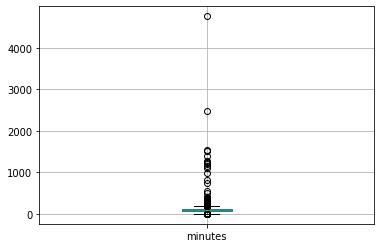

In [ ]:
df_matches.boxplot(column=["minutes"]);

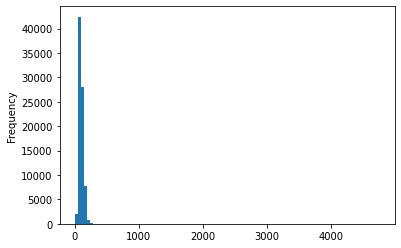

In [ ]:
df_matches['minutes'].plot.hist(bins=100);

We detect too long matches

In [ ]:
df_matches.loc[df_matches['minutes'] > 3*U['minutes'], 'minutes']

30862     1211
35073     1094
54162      814
57206     1146
57322     1531
62351      740
63007     1266
67025     1237
73992     1392
76419      987
87330     1507
88954     2475
112759    1241
113704    4756
Name: minutes, dtype: Int64

In [ ]:
df_matches.loc[df_matches['minutes'] > 3*U['minutes']]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_spectators,tourney_revenue
30862,2017-1075,Wuhan,Hard,64,P,2017-09-25,191,201539,NaN,Christina Mchale,R,170,USA,25.374401,202484,NaN,Nicole Gibbs,R,<NA>,USA,24.563997,6-1 3-6 6-3,3,Q1,1211,3,7,85,51,36,17,13,3,5,1,3,80,49,29,16,12,3,7,79,770,112,548,6139,1030704.06
35073,2017-M024,Cincinnati,Hard,64,P,2017-08-14,293,201662,NaN,Karolina Pliskova,R,184,CZE,25.399042,202429,Q,Camila Giorgi,R,168,ITA,25.623546,6-3 4-6 6-0,3,R16,1094,10,4,83,43,33,22,13,3,4,3,4,88,45,22,28,12,5,9,1,6940,82,719,4546,1146494.43
54162,2016-1049,Auckland,Hard,32,I,2016-01-04,242,202428,NaN,Kiki Bertens,R,182,NED,24.068446,202490,NaN,Rebecca Peterson,R,173,SWE,20.413415,6-4 6-4,3,Q1,814,8,1,60,37,27,14,10,1,2,1,3,76,54,28,15,10,9,12,104,618,131,420,2007,396848.40
57206,2016-M001,Sydney,Hard,32,A,2016-01-11,294,104180,NaN,Gilles Muller,L,193,LUX,32.676249,104871,NaN,Jeremy Chardy,R,188,FRA,28.911704,7-6(5) 6-3,3,QF,1146,14,5,59,35,32,13,10,0,0,2,5,69,44,34,10,11,1,3,38,1105,31,1255,3612,637412.01
57322,2016-M006,Indian Wells,Hard,128,P,2016-03-07,155,201580,NaN,Xinyun Han,L,<NA>,CHN,25.771389,201444,NaN,Su Wei Hsieh,R,169,TPE,30.171116,7-5 6-1,3,Q1,1531,2,5,52,32,20,8,9,0,3,1,3,78,39,17,17,10,6,13,122,495,81,797,18086,2292592.04
62351,2021-9460,Singapore,Hard,32,A,2021-02-22,289,126952,NaN,Soon Woo Kwon,R,180,KOR,23.225188,106034,NaN,Yasutaka Uchiyama,R,<NA>,JPN,28.550308,6-3 6-4,3,R16,740,3,2,59,38,31,12,10,3,3,6,0,57,36,23,12,9,5,7,81,877,109,701,3524,838382.37
63007,2021-0410,Monte Carlo Masters,Clay,64,M,2021-04-12,267,105554,NaN,Daniel Evans,R,175,GBR,30.888433,105583,NaN,Dusan Lajovic,R,180,SRB,30.784394,6-3 6-7(11) 6-2,3,R64,1266,3,3,126,72,47,30,14,9,10,1,2,108,82,51,13,15,2,7,33,1825,31,1895,5697,1120668.52
67025,2016-0447,Samarkand CH,Clay,32,C,2016-05-09,278,122078,NaN,Dmitry Popko,R,<NA>,KAZ,19.540041,106223,NaN,Aleksandre Metreveli,R,<NA>,GEO,22.746064,6-2 6-3,3,R32,1237,4,1,54,35,29,9,9,4,4,3,4,45,27,19,6,8,2,5,208,263,266,193,2038,334531.73
73992,2016-7347,Santiago CH,Clay,32,C,2016-10-17,248,122536,NaN,Juan Pablo Paz,R,<NA>,ARG,21.785079,127309,WC,Cristopher Kohl,U,<NA>,CHI,20.046543,6-2 6-1,3,Q2,1392,0,0,45,29,21,9,7,2,3,0,2,59,35,15,8,8,5,11,337,139,<NA>,<NA>,2642,533199.51
76419,2017-0308,Munich,Clay,32,A,2017-05-01,297,111202,NaN,Hyeon Chung,R,<NA>,KOR,20.950034,105373,NaN,Martin Klizan,L,190,SVK,27.805613,6-4 3-6 6-2,3,QF,987,4,2,81,47,36,15,13,4,6,8,4,95,49,28,27,14,8,12,78,659,53,880,4432,730517.57


We replace them with the Upper Bound

In [ ]:
df_matches.loc[df_matches['minutes'] > 3*U['minutes']] = int(U['minutes'])

We detect to short matches

In [ ]:
df_matches.loc[df_matches['minutes'] < L['minutes'], 'minutes']

248       0
2271      0
2449      0
3358      0
4796      0
         ..
117167    0
117243    0
117454    0
117990    0
118323    0
Name: minutes, Length: 129, dtype: Int64

Only matches that lasted 0 or 1 minute are considered too short

In [ ]:
df_matches.loc[df_matches['minutes'] < L['minutes'], 'minutes'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

This issue can be explained by the fact that there are many games with very few minutes (many with 0) that move the distribution down

In [ ]:
df_matches.loc[df_matches['minutes'] < L['minutes'], 'minutes'].value_counts()

The short matches are almost all W/O

In [ ]:
df_matches.loc[df_matches['minutes'] < L['minutes'], 'score'].value_counts()

array(['3-6 6-3 6-4', 'W/O', nan, '6-3 6-2', '7-5 6-1', '0-0 RET',
       '6-2 6-2', '7-5 2-0 RET'], dtype=object)

In [ ]:
df_matches.loc[df_matches['minutes'] < L['minutes'], 'score']

248       3-6 6-3 6-4
2271              W/O
2449              W/O
3358              W/O
4796              W/O
             ...     
117167            W/O
117243            W/O
117454            W/O
117990            W/O
118323            W/O
Name: score, Length: 129, dtype: object

What to do with W/O matches?

In [ ]:
(df_matches.loc[df_matches['minutes'] < L['minutes']]).loc[df_matches['score'].str.find('W/O')>-1]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_spectators,tourney_revenue
2271,2019-M021,Madrid,Clay,64,PM,2019-05-06 00:00:00,274,201549,NaN,Petra Martic,R,181,CRO,28.292950,201493,NaN,Angelique Kerber,L,173,GER,31.296372,W/O,3,R32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,1470,4,5220,7075,1713855.57
2449,2019-M009,Rome,Clay,64,P,2019-05-13 00:00:00,297,202428,NaN,Kiki Bertens,R,182,NED,27.422313,211768,NaN,Naomi Osaka,R,180,JPN,21.571526,W/O,3,QF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,5115,1,6356,7672,1673097.12
3358,2019-M016,Eastbourne,Grass,64,P,2019-06-24 00:00:00,299,201493,NaN,Angelique Kerber,L,173,GER,31.430527,202460,NaN,Ons Jabeur,R,167,TUN,24.821355,W/O,3,SF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4685,62,885,4516,868154.79
4796,2019-560,Us Open,Hard,128,G,2019-08-26 00:00:00,197,202505,NaN,Belinda Bencic,R,175,SUI,22.461328,204426,NaN,Anett Kontaveit,R,174,EST,23.671458,W/O,3,R32,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,12,2968,21,2380,17634,4672240.98
6051,2018-M020,Brisbane,Hard,32,P,2018-01-01 00:00:00,250,215035,NaN,Dayana Yastremska,R,175,UKR,17.631759,212001,NaN,Natalia Vikhlyantseva,R,<NA>,RUS,20.873374,W/O,3,Q2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,188,306,62,961,4154,741338.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117167,2020-1003,Doha,Hard,64,P,2020-02-24 00:00:00,289,201320,NaN,Svetlana Kuznetsova,R,174,RUS,34.661191,216153,NaN,Amanda Anisimova,R,180,USA,18.483231,W/O,3,R16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,1178,29,1613,7051,1141012.26
117243,2020-2011,Lyon,Hard,32,I,2020-03-02 00:00:00,292,206219,NaN,Oceane Dodin,R,<NA>,FRA,23.353867,213525,NaN,Jil Belen Teichmann,L,170,SUI,22.631075,W/O,3,R16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,487,66,896,3487,452459.95
117454,2020-1082,Prague,Clay,32,I,2020-08-10 00:00:00,287,202536,NaN,Ana Bogdan,R,<NA>,ROU,27.707050,201615,Q,Lesia Tsurenko,R,174,UKR,31.197810,W/O,3,R16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,710,139,460,3342,706318.29
117990,2018-1090,Bol,Clay,32,C,2018-06-05 00:00:00,298,202663,NaN,Magda Linette,R,171,POL,26.310746,201506,NaN,Sara Errani,R,164,ITA,31.101985,W/O,3,SF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,865,75,813,4231,787594.56


What to do with the others? A possible solution is to replace them with the median

In [ ]:
(df_matches.loc[df_matches['minutes'] < L['minutes']]).loc[df_matches['score'].str.find('W/O')==-1]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_spectators,tourney_revenue
248,2019-M001,Sydney,Hard,32,P,2019-01-07 00:00:00,275,201325,WC,Samantha Stosur,R,172,AUS,34.773443,201495,NaN,Dominika Cibulkova,R,161,SVK,29.672827,3-6 6-3 6-4,3,R32,0,15,3,94,56,43,19,14,6,7,2,6,84,55,38,18,14,4,6,73,800,26,1805,3258,567644.24
7879,2018-M007,Miami,Hard,128,PM,2018-03-19 00:00:00,126,212001,NaN,Natalia Vikhlyantseva,R,<NA>,RUS,21.084189,215306,WC,Emiliana Arango,R,<NA>,COL,17.303217,6-3 6-2,3,Q1,0,4,1,54,28,23,15,9,1,1,0,2,51,20,9,18,8,4,7,88,709,517,59,13375,3601609.54
29782,2017-0804,Charleston,Clay,64,P,2017-04-03 00:00:00,278,201496,NaN,Caroline Wozniacki,R,177,DEN,26.729637,202470,NaN,Annika Beck,R,170,GER,23.126626,7-5 6-1,3,R32,0,2,3,68,55,32,7,10,8,11,0,1,50,37,17,3,9,1,7,12,3810,61,925,4377,926105.03
33939,2017-M007,Miami Masters,Hard,128,M,2017-03-20 00:00:00,142,105985,NaN,Darian King,R,<NA>,BAR,24.898015,124187,NaN,Reilly Opelka,R,211,USA,19.559206,0-0 RET,3,Q2,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,121,488,169,337,12310,2004609.28
98553,2021-2030,Adelaide,Hard,32,P,2021-02-22 00:00:00,257,201483,NaN,Madison Brengle,R,<NA>,USA,30.891170,215018,NaN,Destanee Aiava,R,<NA>,AUS,20.788501,6-2 6-2,3,Q1,0,0,3,43,27,22,11,8,2,2,1,4,60,35,22,8,8,5,9,81,969,208,329,3420,660259.04
104107,2019-7085,Biella CH,Clay,64,C,2019-09-16 00:00:00,261,105063,NaN,Andrea Arnaboldi,L,<NA>,ITA,31.720739,106117,NaN,Carlos Boluda Purkiss,R,165,ESP,26.647502,7-5 2-0 RET,3,R64,0,2,0,47,30,25,8,7,4,4,1,3,53,26,17,12,7,5,7,299,135,408,85,6661,1140571.61


In [ ]:
df_matches.loc[[248,7879,29782,98553,104107], 'minutes'] = M['minutes']

What to do with the very short matches?

In [ ]:
df_matches.loc[df_matches['minutes'] <10]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_spectators,tourney_revenue
2271,2019-M021,Madrid,Clay,64,PM,2019-05-06 00:00:00,274,201549,NaN,Petra Martic,R,181,CRO,28.292950,201493,NaN,Angelique Kerber,L,173,GER,31.296372,W/O,3,R32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,1470,4,5220,7075,1713855.57
2449,2019-M009,Rome,Clay,64,P,2019-05-13 00:00:00,297,202428,NaN,Kiki Bertens,R,182,NED,27.422313,211768,NaN,Naomi Osaka,R,180,JPN,21.571526,W/O,3,QF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,5115,1,6356,7672,1673097.12
3358,2019-M016,Eastbourne,Grass,64,P,2019-06-24 00:00:00,299,201493,NaN,Angelique Kerber,L,173,GER,31.430527,202460,NaN,Ons Jabeur,R,167,TUN,24.821355,W/O,3,SF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4685,62,885,4516,868154.79
4481,2019-M024,Cincinnati Masters,Hard,64,M,2019-08-12 00:00:00,198,126094,NaN,Andrey Rublev,R,188,RUS,21.809719,106071,Alt,Bernard Tomic,R,193,AUS,26.806297,2-1 RET,3,Q1,9,2,0,5,2,2,2,1,0,0,0,4,12,8,5,0,2,0,1,70,836,88,617,7759,1692353.55
4796,2019-560,Us Open,Hard,128,G,2019-08-26 00:00:00,197,202505,NaN,Belinda Bencic,R,175,SUI,22.461328,204426,NaN,Anett Kontaveit,R,174,EST,23.671458,W/O,3,R32,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,12,2968,21,2380,17634,4672240.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117706,2020-W-FC-2020-G1-AO-A-M-IND-UZB-01,Fed Cup G1 RR: IND vs UZB,Hard,2,D,2020-03-04 00:00:00,1,206105,NaN,Rutuja Bhosale,R,<NA>,IND,23.937029,201454,NaN,Akgul Amanmuradova,R,<NA>,UZB,35.696099,2-6 6-2 7-5,3,RR,9,0,8,96,68,42,6,14,5,12,5,8,134,88,48,17,14,22,30,433,95,398,110,261,53564.64
117714,2020-W-FC-2020-G1-AO-A-M-TPE-KOR-01,Fed Cup G1 RR: TPE vs KOR,Hard,2,D,2020-03-04 00:00:00,1,204294,NaN,Su Jeong Jang,R,<NA>,KOR,24.977413,222390,NaN,Ya Yi Yang,L,<NA>,TPE,15.761807,6-3 6-1,3,RR,5,2,4,58,38,25,11,8,7,8,0,2,63,42,21,8,8,8,13,309,170,852,20,267,53937.71
117936,2018-1072,Limoges,Hard,32,C,2018-11-05 00:00:00,299,201516,NaN,Evgeniya Rodina,R,<NA>,RUS,29.749487,202506,NaN,Margarita Gasparyan,R,<NA>,RUS,24.177960,3-0 RET,3,SF,7,0,0,10,10,8,0,2,0,0,0,1,4,0,0,0,1,0,1,88,699,105,609,2145,367389.65
117990,2018-1090,Bol,Clay,32,C,2018-06-05 00:00:00,298,202663,NaN,Magda Linette,R,171,POL,26.310746,201506,NaN,Sara Errani,R,164,ITA,31.101985,W/O,3,SF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,865,75,813,4231,787594.56


The W/O matches are full of nan and 0 values

In [ ]:
df_matches.loc[df_matches['score'].str.find('W/O')>-1, 'minutes']

108       <NA>
262       <NA>
863       <NA>
1101      <NA>
1156      <NA>
          ... 
185372    <NA>
185664    <NA>
185937    <NA>
185979    <NA>
185981    <NA>
Name: minutes, Length: 874, dtype: Int64

In [ ]:
df_matches.loc[df_matches['score'].str.find('W/O')>-1, 'minutes'].unique()

<IntegerArray>
[<NA>, 0, 100, 56, 1]
Length: 5, dtype: Int64

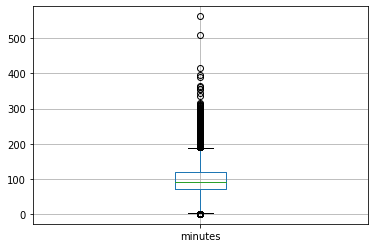

In [ ]:
df_matches.boxplot(column=["minutes"]);

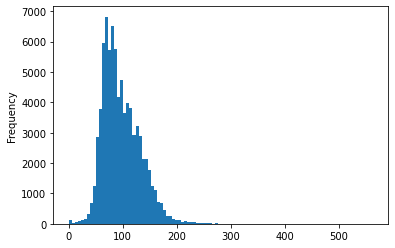

In [ ]:
df_matches['minutes'].plot.hist(bins=100);

How to deal the outliers > U (upperbound)?

**Ace faeture**

The ace attribute, like all other player-related match statistics, is a positive integer variable which can also be 0. So for these attributes we will only look for outlier values that are too high, making sure there are no negative values

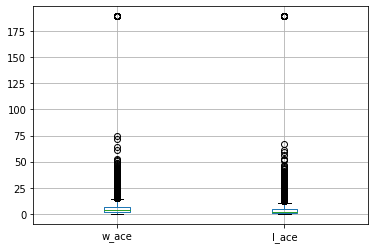

In [ ]:
df_matches.boxplot(column=["w_ace", "l_ace"]);

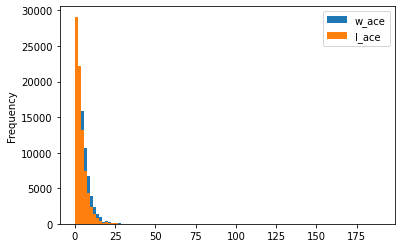

In [ ]:
df_matches[['w_ace', 'l_ace']].plot.hist(bins=100);

There are not negative values

In [ ]:
df_matches['w_ace'].min()

In [ ]:
df_matches['l_ace'].min()

We detect very high values

In [ ]:
df_matches.loc[df_matches['w_ace'] > 3*U['w_ace'], 'w_ace']

21         44
4659       48
6351       53
9631       64
9679       49
30862     189
32440      45
33343      75
35073     189
54162     189
56091      51
56592      61
57099      44
57206     189
57322     189
59137      46
62351     189
63007     189
67025     189
73992     189
76419     189
87330     189
88954     189
99567      72
111481     52
112759    189
113704    189
162727     49
Name: w_ace, dtype: Int64

There are some records that have 189 assigned to each attribute

In [ ]:
df_matches.loc[df_matches['w_ace'] > 3*U['w_ace']]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_spectators,tourney_revenue
21,2019-M020,Brisbane,Hard,32,A,2018-12-31 00:00:00,277,106401,NaN,Nick Kyrgios,R,193,AUS,23.679671,105992,NaN,Ryan Harrison,R,183,USA,26.650240,7-6(5) 5-7 7-6(5),3,R32,128,44,3,119,80,63,24,18,1,2,27,3,113,77,60,24,18,5,5,35,1125,62,810,3928,742618.69
4659,2019-560,US Open,Hard,128,G,2019-08-26 00:00:00,187,122330,NaN,Alexander Bublik,R,196,KAZ,22.190281,105341,NaN,Thomas Fabbiano,R,<NA>,ITA,30.250513,6-7(3) 5-7 6-4 6-3 6-3,5,R64,220,48,26,196,95,78,44,27,10,12,3,8,161,105,70,35,26,8,13,75,808,87,610,17634,4672240.98
6351,2018-580,Australian Open,Hard,128,G,2018-01-15 00:00:00,216,103333,NaN,Ivo Karlovic,R,208,CRO,38.880219,105216,NaN,Yuichi Sugita,R,173,JPN,29.325120,7-6(3) 6-7(3) 7-5 4-6 12-10,5,R64,273,53,10,207,137,117,37,34,11,12,16,14,213,133,110,42,34,8,10,89,615,41,1200,7195,1316125.97
9631,2018-540,Wimbledon,Grass,128,G,2018-07-02 00:00:00,176,104545,NaN,John Isner,R,206,USA,33.182752,105074,NaN,Ruben Bemelmans,L,<NA>,BEL,30.464066,6-1 6-4 6-7(6) 6-7(3) 7-5,5,R64,226,64,3,154,121,97,20,28,3,3,7,5,178,113,83,36,27,6,10,10,3045,104,545,15979,3761778.69
9679,2018-540,Wimbledon,Grass,128,G,2018-07-02 00:00:00,224,104731,NaN,Kevin Anderson,R,203,RSA,32.123203,104545,NaN,John Isner,R,206,USA,33.182752,7-6(6) 6-7(5) 6-7(9) 6-4 26-24,5,SF,396,49,4,278,198,166,47,49,3,5,53,6,291,218,171,35,50,7,11,8,3635,10,3045,15979,3761778.69
30862,189,189,189,189,189,189,189,189,189,189,189,189,189,189.000000,189,189,189,189,189,189,189.000000,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189.00
32440,2017-540,Wimbledon,Grass,128,G,2017-07-03 00:00:00,175,104180,NaN,Gilles Muller,L,193,LUX,34.151951,104586,NaN,Lukas Rosol,R,196,CZE,31.942505,7-5 6-7(7) 4-6 6-3 9-7,5,R64,217,45,13,173,110,96,30,30,11,13,25,8,183,119,93,31,29,10,14,26,1675,214,249,13332,3749463.21
33343,2017-580,Australian Open,Hard,128,G,2017-01-16 00:00:00,152,103333,NaN,Ivo Karlovic,R,208,CRO,37.883641,104547,NaN,Horacio Zeballos,L,188,ARG,31.723477,6-7(6) 3-6 7-5 6-2 22-20,5,R128,314,75,12,213,140,127,44,42,3,4,33,9,237,152,125,49,41,5,9,21,1795,68,725,11038,2876086.35
35073,189,189,189,189,189,189,189,189,189,189,189,189,189,189.000000,189,189,189,189,189,189,189.000000,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189.00
54162,189,189,189,189,189,189,189,189,189,189,189,189,189,189.000000,189,189,189,189,189,189,189.000000,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189.00


We replace them with the upper bound

In [ ]:
df_matches.loc[df_matches['w_ace'] > 3*U['w_ace'], 'w_ace'] = int(U['w_ace'])

Same analysis for the losers

In [ ]:
df_matches.loc[df_matches['l_ace'] > 3*U['l_ace']]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_spectators,tourney_revenue
139,2019-0891,Pune,Hard,32,A,2018-12-31 00:00:00,300,104731,NaN,Kevin Anderson,R,203,RSA,32.621492,103333,NaN,Ivo Karlovic,R,208,CRO,39.838467,7-6(4) 6-7(2) 7-6(5),3,F,164,21,6,104,65,57,26,18,0,0,36,4,118,83,74,16,18,8,8,6,4710,100,589,4062,1005592.39
310,2019-580,Australian Open,Hard,128,G,2019-01-14 00:00:00,155,124187,NaN,Reilly Opelka,R,211,USA,21.379877,104545,NaN,John Isner,R,206,USA,33.719370,7-6(4) 7-6(6) 6-7(4) 7-6(5),5,R128,178,40,6,151,87,74,42,24,1,2,47,2,138,107,93,19,24,2,3,97,593,10,3155,15583,2781000.18
369,2019-580,Australian Open,Hard,128,G,2019-01-14 00:00:00,171,105453,NaN,Kei Nishikori,R,178,JPN,29.043121,103333,NaN,Ivo Karlovic,R,208,CRO,39.876797,6-3 7-6(6) 5-7 5-7 7-6(7),5,R64,228,9,2,158,121,96,26,29,3,5,59,3,170,128,100,26,28,5,6,9,3750,73,739,15583,2781000.18
427,2019-580,Australian Open,Hard,128,G,2019-01-14 00:00:00,191,105341,NaN,Thomas Fabbiano,R,<NA>,ITA,29.637235,124187,NaN,Reilly Opelka,R,211,USA,21.379877,6-7(15) 6-2 6-4 3-6 7-6(5),5,R64,212,2,4,166,133,106,16,26,4,5,67,8,168,108,92,26,25,2,5,102,573,97,593,15583,2781000.18
938,2019-0424,New York,Hard,32,A,2019-02-11 00:00:00,299,124187,NaN,Reilly Opelka,R,211,USA,21.456537,104545,NaN,John Isner,R,206,USA,33.796030,6-7(8) 7-6(14) 7-6(4),3,SF,151,43,1,116,87,79,22,18,1,1,38,1,125,110,92,9,18,2,2,89,633,9,3155,3308,645211.09
962,2019-0424,New York,Hard,32,A,2019-02-11 00:00:00,272,105430,NaN,Radu Albot,R,175,MDA,29.251198,103333,NaN,Ivo Karlovic,R,208,CRO,39.953457,6-7(4) 7-6(4) 7-6(5),3,R32,138,4,4,124,95,75,18,18,2,2,37,3,110,89,80,9,18,0,0,79,705,81,674,3308,645211.09
3461,2019-540,Wimbledon,Grass,128,G,2019-07-01 00:00:00,171,105341,NaN,Thomas Fabbiano,R,<NA>,ITA,30.097194,103333,NaN,Ivo Karlovic,R,208,CRO,40.336756,6-3 6-7(6) 6-3 6-7(4) 6-4,5,R64,187,9,3,160,119,94,27,29,1,1,38,8,146,94,78,28,25,4,7,89,639,80,679,8964,1498510.45
3481,2019-540,Wimbledon,Grass,128,G,2019-07-01 00:00:00,191,105062,NaN,Mikhail Kukushkin,R,183,KAZ,31.512663,104545,NaN,John Isner,R,206,USA,34.179329,6-4 6-7(3) 4-6 6-1 6-4,5,R64,186,6,0,149,118,90,18,26,7,8,34,1,151,114,80,20,24,5,9,58,885,12,2715,8964,1498510.45
4682,2019-560,US Open,Hard,128,G,2019-08-26 00:00:00,210,105227,NaN,Marin Cilic,R,198,CRO,30.907598,104545,NaN,John Isner,R,206,USA,34.332649,7-5 3-6 7-6(6) 6-4,5,R32,199,21,17,156,81,65,39,21,13,14,40,4,133,95,74,20,23,2,4,23,1590,14,2075,17634,4672240.98
5134,2019-7581,Chengdu,Hard,32,A,2019-09-23 00:00:00,293,106078,SE,Egor Gerasimov,R,196,BLR,26.863792,104545,NaN,John Isner,R,206,USA,34.409309,6-7(11) 7-6(5) 7-6(4),3,R16,151,24,2,114,82,71,22,18,0,0,35,3,121,90,76,17,18,2,2,98,565,19,1805,3014,675918.40


In [ ]:
df_matches.loc[df_matches['l_ace'] > 3*U['l_ace'], 'loser_name']

139               Ivo Karlovic
310                 John Isner
369               Ivo Karlovic
427              Reilly Opelka
938                 John Isner
962               Ivo Karlovic
3461              Ivo Karlovic
3481                John Isner
4682                John Isner
5134                John Isner
6296            Kevin Anderson
6331              Milos Raonic
6370             Gilles Muller
6375              Ivo Karlovic
6386              Nick Kyrgios
9620              Ivo Karlovic
9679                John Isner
10516               John Isner
30862                      189
32385             Ivo Karlovic
32450               John Isner
32870             Ivo Karlovic
35073                      189
54162                      189
56115          Albano Olivetti
56139             Ivo Karlovic
56171               John Isner
57206                      189
57322                      189
59012            Reilly Opelka
59156            Reilly Opelka
60318               John Isner
62096   

In [ ]:
df_matches.loc[df_matches['l_ace'] > 3*U['l_ace'], 'l_ace'] = int(U['l_ace'])

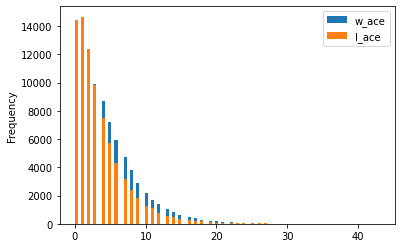

In [ ]:
df_matches[['w_ace', 'l_ace']].plot.hist(bins=100);

##Correlations

In [ ]:
categorical_features = ['tourney_id','tourney_name','surface','tourney_level', 'tourney_date','match_num', 'winner_id', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ioc', 'loser_id', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ioc', 'score', 'round']
numerical_features = ['draw_size', 'winner_ht',	'winner_age', 'loser_ht',	'loser_age', 'best_of',	'minutes', 'w_ace',	'w_df',	'w_svpt',	'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced',	'l_ace', 'l_df', 'l_svpt', 'l_1stIn',	'l_1stWon',	'l_2ndWon',	'l_SvGms', 'l_bpSaved',	'l_bpFaced', 'winner_rank',	'winner_rank_points',	'loser_rank',	'loser_rank_points', 'tourney_spectators', 'tourney_revenue']

In [ ]:
df_matches_numerical=df_matches[numerical_features]

In [ ]:
df_matches_numerical.corr()

Searching highly-corraleted features

In [ ]:
features = df_matches_numerical.columns
correl_matrix = np.array(df_matches_numerical.corr())
correl_attrib = []
n_row, n_col = correl_matrix.shape[0], correl_matrix.shape[1]

CORREL_THRESHOLD = 0.9

for i in range(n_row):
    for j in range(i + 1, n_col):
        if correl_matrix[i, j] > CORREL_THRESHOLD or correl_matrix[i, j] < -CORREL_THRESHOLD:
            correl_attrib.append((features[i], features[j]))

correl_attrib

**"Categorical" features**

In [ ]:
df_matches_categorical = df_matches[categorical_features]

In [ ]:
df_matches_categorical.head()

#**Questa parte è data preparation** Now let's create a new dataset for the players

In [ ]:
players_w = df_matches[["winner_name"]].rename(columns={"winner_name":"Name"})  # player names extracted from the winners
players_l = df_matches[["loser_name"]].rename(columns={"loser_name":"Name"})  # player names extracted from the losers

# first we append the losers list to the winners one
df_players = players_w.append(players_l)

# the redundant records are dropped and a new dataframe is built from the list of players
df_players = df_players.drop_duplicates()
print("{0}\n".format(df_players.info()))
print(df_players.isnull().any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10104 entries, 0 to 185940
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    10104 non-null  object
dtypes: object(1)
memory usage: 157.9+ KB
None

Name    False
dtype: bool


There's only one record with no value, let's drop it.

In [ ]:
df_players = df_players.dropna()
df_players.isnull().any()

Name    False
dtype: bool

The new dataframe has only one attribute, as the head() method shows.

In [ ]:
df_players.head()

,Name
0,Kei Nishikori
1,Daniil Medvedev
3,Jo-Wilfried Tsonga
5,Jeremy Chardy
8,Alex De Minaur


Now, we need to know if a player is male or female, that's when df_male and df_female come to help us.

In [ ]:
def players_from_sex(df_players_sex, df_players_matches):
  """
  Obtain the players of a specific sex given a dataset of that sex
  :param df_players_sex: players dataframe (M or F) from where we obtain the sex
  :param df_players_matches: players dataframe built from the matches
  :return players: list of players (M or F)
  :return index: players indexes (M or F)
  """
  players_name = list(df_players_sex["name"])
  players_surname = list(df_players_sex["surname"])
    
  #lista di players nome e cognome da df_players
  players = list()
  for n, s in zip(players_name, players_surname):
    players.append("{0} {1}".format(n, s))

  players = df_players_matches[df_players_matches["Name"].isin(players)]

  players_indexes = players.index

  return list(players["Name"]), players_indexes

In [ ]:
[players_m, i_male_found] = players_from_sex(df_male, df_players)
[players_f, i_female_found] = players_from_sex(df_female, df_players)

# players for which we have found the sex
players_sex_found = players_m+players_f

# players that belong to both datasets
players_both_sex = list(set(players_m) & set(players_f))
print("Players found in both datasets (male and female):\n{0}\n".format(players_both_sex))

# players with no sex
players_sex_not_found = df_players[~df_players["Name"].isin(players_sex_found)]

# some stats about what we found
print("Number of male players: {0}".format(len(players_m)))
print("Number of female players: {0}".format(len(players_f)))
print("Number of players: {0}".format(len(df_players)))
print("Number of players with no sex known: {0}\n".format(len(players_sex_not_found)))
players_sex_not_found

Players found in both datasets (male and female):
['Di Zhao', 'Yi Liu', 'Ziyu Zhang', 'Yang Liu', 'Kuan Yi Lee', 'Austin Smith']

Number of male players: 3018
Number of female players: 7062
Number of players: 10104
Number of players with no sex known: 30



,Name
3,Jo-Wilfried Tsonga
59,Cristian Garin
105,Stan Wawrinka
168,Antoine Hoang
185,Taylor Fritz
206,Mackenzie McDonald
221,Diego Schwartzman
306,Frances Tiafoe
563,Pedro Martinez
597,Lloyd Harris


All of the players with no known sex are in one of the datasets (male or female) but their name is written differently (e.g.: uppercase in matches but undercase in males), so we need to assign them a sex by looking at the tournaments they took part.

In [ ]:
# let's insert a new attribute (sex) and assign the right values
df_players.loc[i_male_found, 'Sex'] = 'M'
df_players.loc[i_female_found, 'Sex'] = 'F'
df_players.info()

To obtain the sex of those players with no known sex we can take a look at the tournaments' levels they took part in, since there's only one type that is shared by both sexes.

In [ ]:
# tournament levels for each sex
male_t = {'M', 'G', 'C', 'A', 'S', 'F'}
female_t = {'P', 'PM', 'I', 'T1', '15', '25', '60', '100', '80', '10', '50', '75'}

players_sex_not_found_i = players_sex_not_found.index
for player, i in zip(players_sex_not_found["Name"], players_sex_not_found_i):
  player_matches_info = df_matches[df_matches['loser_name']==player]
  player_t_levels = set(player_matches_info["tourney_level"].dropna())
  if len(player_t_levels.intersection(male_t)) > 0:
    sex = "M"
    players_m.insert(i, player)
  else:
    if len(player_t_levels.intersection(female_t)) > 0:
      sex = "F"
      players_f.insert(i, player)
    else:
      sex = "Not known"
  
  df_players.loc[i, "Sex"] = sex
  print("{0} {1}".format(player, sex))

Now there are no more missing values for the sex attribute and each player is either M or F.

In [ ]:
df_players.info()

We still need to work on those players who appear in both the male and female datasets.

In [ ]:
players_both_sex = df_players[df_players["Name"].isin(players_both_sex)]
players_both_sex_i = players_both_sex.index
players_both_sex

**Non funziona**

In [ ]:
players_both_sex_i = players_both_sex.index
for player, i in zip(players_both_sex["Name"], players_both_sex_i):
  player_matches_info = df_matches[df_matches['loser_name']==player]
  player_t_levels = set(player_matches_info["tourney_level"].dropna())
  if len(player_t_levels.intersection(male_t)) > 0 & len(player_t_levels.intersection(female_t)) == 0:
    sex = "M"
    players_m.remove(player)
  else:
    if len(player_t_levels.intersection(female_t)) > 0 & len(player_t_levels.intersection(male_t)) == 0:
      sex = "F"
      players_f.remove(player)
    else:
      sex = "Not known"
  
  df_players.loc[i, "Sex"] = sex
  print("{0} {1}".format(player, sex))

Every player has just one sex after our work.



In [ ]:
print(len(players_f))
print(len(players_m))
print(len(df_players))

#**Cambiare tutto da qui in poi**

Let's take a look to the players dataframes by calling the head() method, which shows the first five lines of the dataframes.

In [ ]:
df_male.head()

In [ ]:
df_female.head()

Let's now use the info() method to obtain information on the two player datasets.

In [ ]:
print("Male players dataframe info")
df_male.info()
print("\nFemale players dataframe info")
df_female.info()

As we can see from the previous infos, there are null values both in the male and female dataset.

In [ ]:
print("Male players dataframe null values:\n{0}".format(df_male.isnull().any()))
print("\nFemale players dataframe null values:\n{0}".format(df_female.isnull().any()))

We need to drop such elements with null values.

In [ ]:
df_male = df_male.dropna()
df_female = df_female.dropna()
print("Male players dataframe info:")
df_male.info()
print("\nFemale players dataframe info:")
df_female.info()

There could be duplicates in the same dataset, but we know that there's a possibility that two players could share the same name and surname, so we won't change anything.

But, there are elements where the values are missing, or incomplete, but not null (look at df_female.head()), we need to remove such elements.

In [ ]:
elements_not_to_keep = ["Unknown", "??"]
df_male = df_male[df_male["name"].str.len()>1]
df_male = df_male[df_male["surname"].str.len()>1]
df_male = df_male[~df_male["name"].isin(elements_not_to_keep)]
df_male = df_male[~df_male["surname"].isin(elements_not_to_keep)]
df_male.info()
# df_male[df_male["name"].isin(["??"])]
# df_male.where(df_male.name.str.len()==1)
# Ci sono altri elementi che non sono compatibili, andrebbero visti a mano